# Partial Differentiation

Numerically, partial differentiation works very similarly to the total differentiation we met in week 3.
Say we have some function of three variables $f(x,y,z)$ that we would like to partially differentiate with respect to $x$.
This means that all of the other variables, $y$ and $z$, are kept constant.
Writing this in finite-difference form, we have
$$\frac{\partial f}{\partial x} = \frac{f(x+h, y, z)-f(x,y,z)}{h}.$$
The same goes for the other variables $y$ and $z$.
We can use these facts to evaluate partial derivatives of functions numerically.

Let us take for example
$$f(x,y) = 4x^3 - 5 xy^2 + 3y^3.$$
The partial derivatives, found analytically, are
\begin{align}
\frac{\partial f}{\partial x} &= 12x^2 - 5 y^2, & \frac{\partial f}{\partial y} &= -10xy + 9 y^2.
\end{align}

We'll start by plotting the analytical results.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x,y):
    return 4.0*x**3 - 5.0*x*y**2 + 3.0*y**3

def dfdx(x,y):
    return 12.0*x**2 - 5.0*y**2

def dfdy(x,y):
    return -10.0*x*y + 9.0*y**2

lim = 10
xv,yv = lim*np.linspace(-1,1,500), lim*np.linspace(-1,1,500)
X,Y = np.meshgrid(xv, yv)

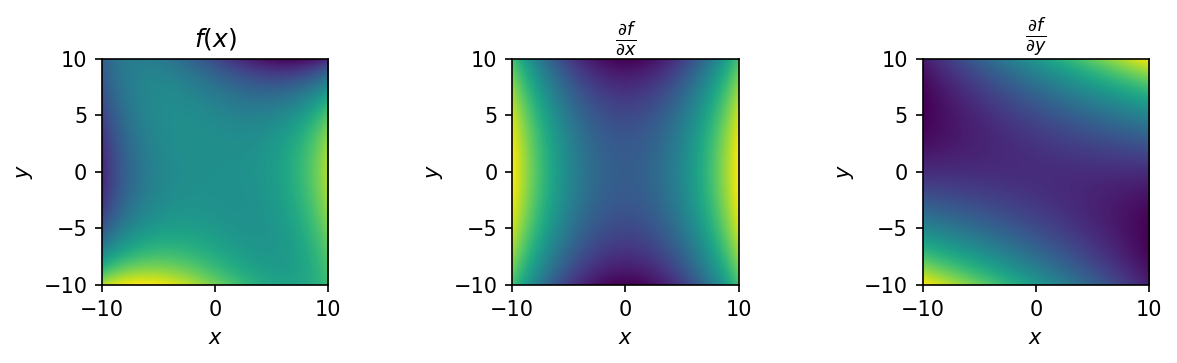

In [2]:
fig, axs = plt.subplots(1,3, dpi=150, figsize=(10,2))
axs[0].imshow(f(X,Y), extent=(-lim,lim,-lim,lim))
axs[1].imshow(dfdx(X,Y), extent=(-lim,lim,-lim,lim))
axs[2].imshow(dfdy(X,Y), extent=(-lim,lim,-lim,lim))

axs[0].set_title("$f(x)$")
axs[1].set_title("$\\frac{\partial f}{\partial x}$")
axs[2].set_title("$\\frac{\partial f}{\partial y}$")

for ax in axs:
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

plt.show()

Now, in the same way we did in week 3, we'll differentiate numerically to find the derivatives.

In [3]:
h = 1e-6
dfdx_numerical = ( f(X+h, Y) - f(X,Y) ) / (h)
dfdy_numerical = ( f(X, Y+h) - f(X,Y) ) / (h)

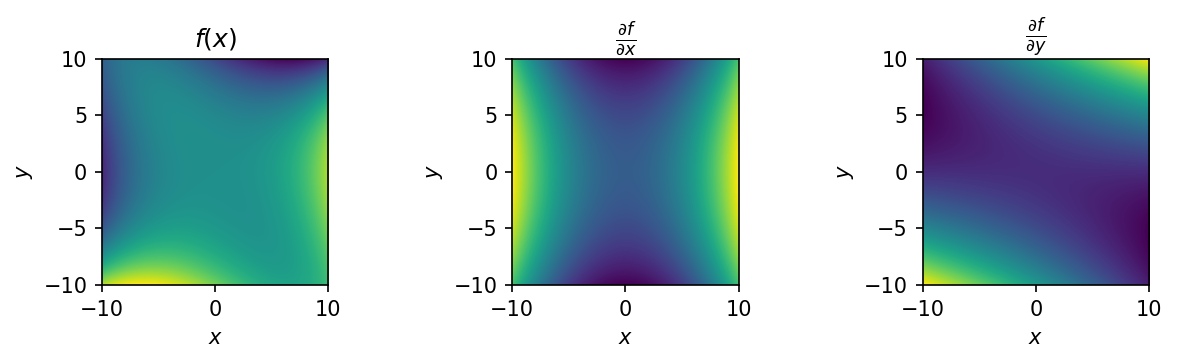

In [4]:
fig, axs = plt.subplots(1,3, dpi=150, figsize=(10,2))
axs[0].imshow(f(X,Y), extent=(-lim,lim,-lim,lim))
axs[1].imshow(dfdx_numerical, extent=(-lim,lim,-lim,lim))
axs[2].imshow(dfdy_numerical, extent=(-lim,lim,-lim,lim))

axs[0].set_title("$f(x)$")
axs[1].set_title("$\\frac{\partial f}{\partial x}$")
axs[2].set_title("$\\frac{\partial f}{\partial y}$")

for ax in axs:
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")
    
plt.show()

Now let's see how different the two really are.

In [5]:
err_x = np.abs(dfdx(X,Y)-dfdx_numerical)
err_y = np.abs(dfdy(X,Y)-dfdy_numerical)

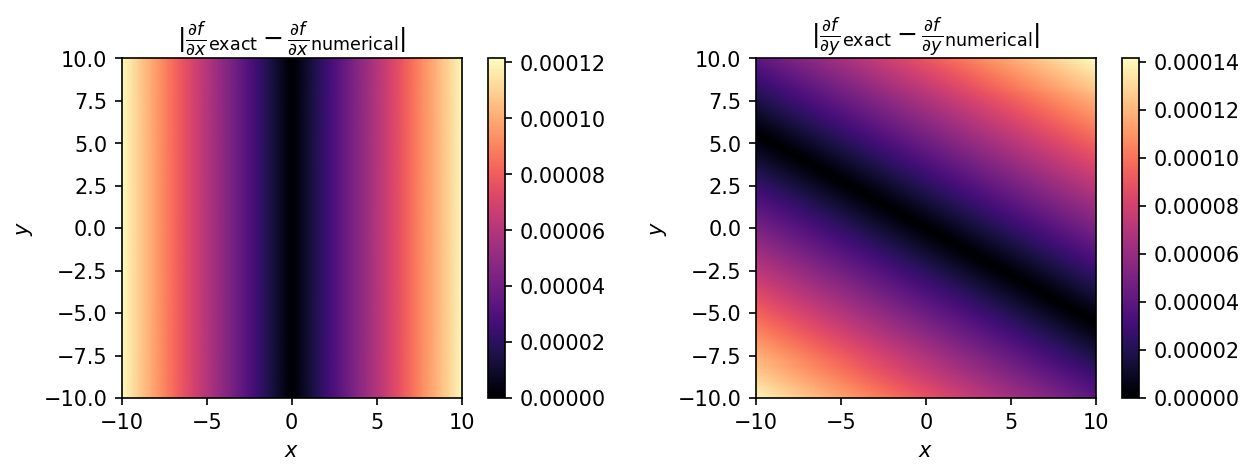

In [6]:
fig,axs = plt.subplots(1,2, dpi=150, figsize=(10,3))
im0 = axs[0].imshow(err_x, extent=(-lim,lim,-lim,lim), cmap="magma", vmin=0)
im1 = axs[1].imshow(err_y, extent=(-lim,lim,-lim,lim), cmap="magma", vmin=0)
plt.colorbar(im0, ax=axs[0])
plt.colorbar(im1, ax=axs[1])

axs[0].set_title("$|\\frac{\partial f}{\partial x}_{\\rm exact} - \\frac{\partial f}{\partial x}_{\\rm numerical}|$")
axs[1].set_title("$|\\frac{\partial f}{\partial y}_{\\rm exact} - \\frac{\partial f}{\partial y}_{\\rm numerical}|$")

for ax in axs:
    ax.set_xlabel("$x$")
    ax.set_ylabel("$y$")

plt.show()